In [1]:
import numpy as np
import cv2
import re
from textblob import TextBlob
from imutils.object_detection import non_max_suppression
import pytesseract
from matplotlib import pyplot as plt

In [2]:
imagepath = "C://Users//Abhilasha//Desktop//text1.jpg"
st=[]
image = cv2.imread(imagepath)

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
orig = gray.copy()
(origH, origW) = image.shape[:2]
(newW, newH) = (640,640)
rW = origW / float(newW)
rH = origH / float(newH)
image = cv2.resize(image, (newW, newH))
(H, W) = image.shape[:2]

In [4]:
blob = cv2.dnn.blobFromImage(image, 1.0, (W, H),(123.68, 116.78, 103.94), swapRB=True, crop=False)
net = cv2.dnn.readNet(r'C:\\Users\\Abhilasha\\final_hackabit1\\frozen_east_text_detection.pb')
layerNames = ["feature_fusion/Conv_7/Sigmoid","feature_fusion/concat_3"]
net.setInput(blob)
(scores, geometry) = net.forward(layerNames)
def predictions(prob_score, geo):
    (numR, numC) = prob_score.shape[2:4]
    boxes = []
    confidence_val = []
    for y in range(0, numR):
        scoresData = prob_score[0, 0, y]
        x0 = geo[0, 0, y]
        x1 = geo[0, 1, y]
        x2 = geo[0, 2, y]
        x3 = geo[0, 3, y]
        anglesData = geo[0, 4, y]
        for i in range(0, numC):
            if scoresData[i] < 0.5:
                continue
            (offX, offY) = (i * 4.0, y * 4.0)
            angle = anglesData[i]
            cos = np.cos(angle)
            sin = np.sin(angle)
            h = x0[i] + x2[i]
            w = x1[i] + x3[i]
            endX = int(offX + (cos * x1[i]) + (sin * x2[i]))
            endY = int(offY - (sin * x1[i]) + (cos * x2[i]))
            startX = int(endX - w)
            startY = int(endY - h)
            boxes.append((startX, startY, endX, endY))
            confidence_val.append(scoresData[i])

    return (boxes, confidence_val)
(boxes, confidence_val) = predictions(scores, geometry)
boxes = non_max_suppression(np.array(boxes), probs=confidence_val)
results = []

In [5]:
for (startX, startY, endX, endY) in boxes:
    startX = int(startX * rW)
    startY = int(startY * rH)
    endX = int(endX * rW)
    endY = int(endY * rH)
    r = orig[startY:endY, startX:endX]  
    configuration = ("-l eng --oem 1 --psm 6")
    pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract'
    text = pytesseract.image_to_string(r, config=configuration)
    results.append(((startX, startY, endX, endY), text))

orig_image = orig.copy()
results = sorted(results, key=lambda r:r[0][1])
for ((start_X, start_Y, end_X, end_Y), text) in results:

    print("{}\n".format(text))
    st.append(format(text))

    text = "".join([x if ord(x) < 128 else "" for x in text]).strip()
    cv2.rectangle(orig_image, (start_X, start_Y), (end_X, end_Y), (255, 255, 255), 2)
    cv2.putText(orig_image, text, (start_X, start_Y-30), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0, 0, 255), 2)

Trinity



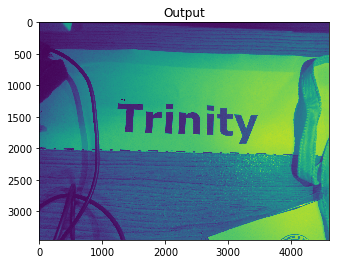

Trinity
trinity


In [6]:
plt.imshow(orig_image)
plt.title('Output')
plt.show()
list_1_string = ' '.join(st)
print(list_1_string)
text=TextBlob(list_1_string.lower())
print(text.correct())
